In [1]:
%matplotlib inline

In [2]:
import os
home_folder = os.path.expanduser("~")
print(home_folder)

C:\Users\rober


In [3]:
# Change this to the location of your dataset
data_filename = "data/ionosphere.data"
print(data_filename)

data/ionosphere.data


In [4]:
import csv
import numpy as np

# Size taken from the dataset and is known already
X = np.zeros((351, 34), dtype='float')
y = np.zeros((351,), dtype='bool')

with open(data_filename, 'r') as input_file:
    reader = csv.reader(input_file)
    for i, row in enumerate(reader):
        # Get the data, converting each item to a float
        data = [float(datum) for datum in row[:-1]]
        # Set the appropriate row in our dataset
        X[i] = data
        # 1 if the class is 'g', 0 otherwise
        y[i] = row[-1] == 'g'

In [5]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14)
print("There are {} samples in the training dataset".format(X_train.shape[0]))
print("There are {} samples in the testing dataset".format(X_test.shape[0]))
print("Each sample has {} features".format(X_train.shape[1]))

There are 263 samples in the training dataset
There are 88 samples in the testing dataset
Each sample has 34 features


In [6]:
from sklearn.neighbors import KNeighborsClassifier

estimator = KNeighborsClassifier()

In [7]:
estimator.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [8]:
y_predicted = estimator.predict(X_test)
accuracy = np.mean(y_test == y_predicted) * 100
print("The accuracy is {0:.1f}%".format(accuracy))

The accuracy is 86.4%


In [9]:
from sklearn.cross_validation import cross_val_score

In [10]:
scores = cross_val_score(estimator, X, y, scoring='accuracy')
average_accuracy = np.mean(scores) * 100
print("The average accuracy is {0:.1f}%".format(average_accuracy))

The average accuracy is 82.3%


In [11]:
avg_scores = []
all_scores = []
parameter_values = list(range(1, 21))  # Including 20
for n_neighbors in parameter_values:
    estimator = KNeighborsClassifier(n_neighbors=n_neighbors)
    scores = cross_val_score(estimator, X, y, scoring='accuracy')
    avg_scores.append(np.mean(scores))
    all_scores.append(scores)

In [12]:
plt.plot?

Object `plt.plot` not found.


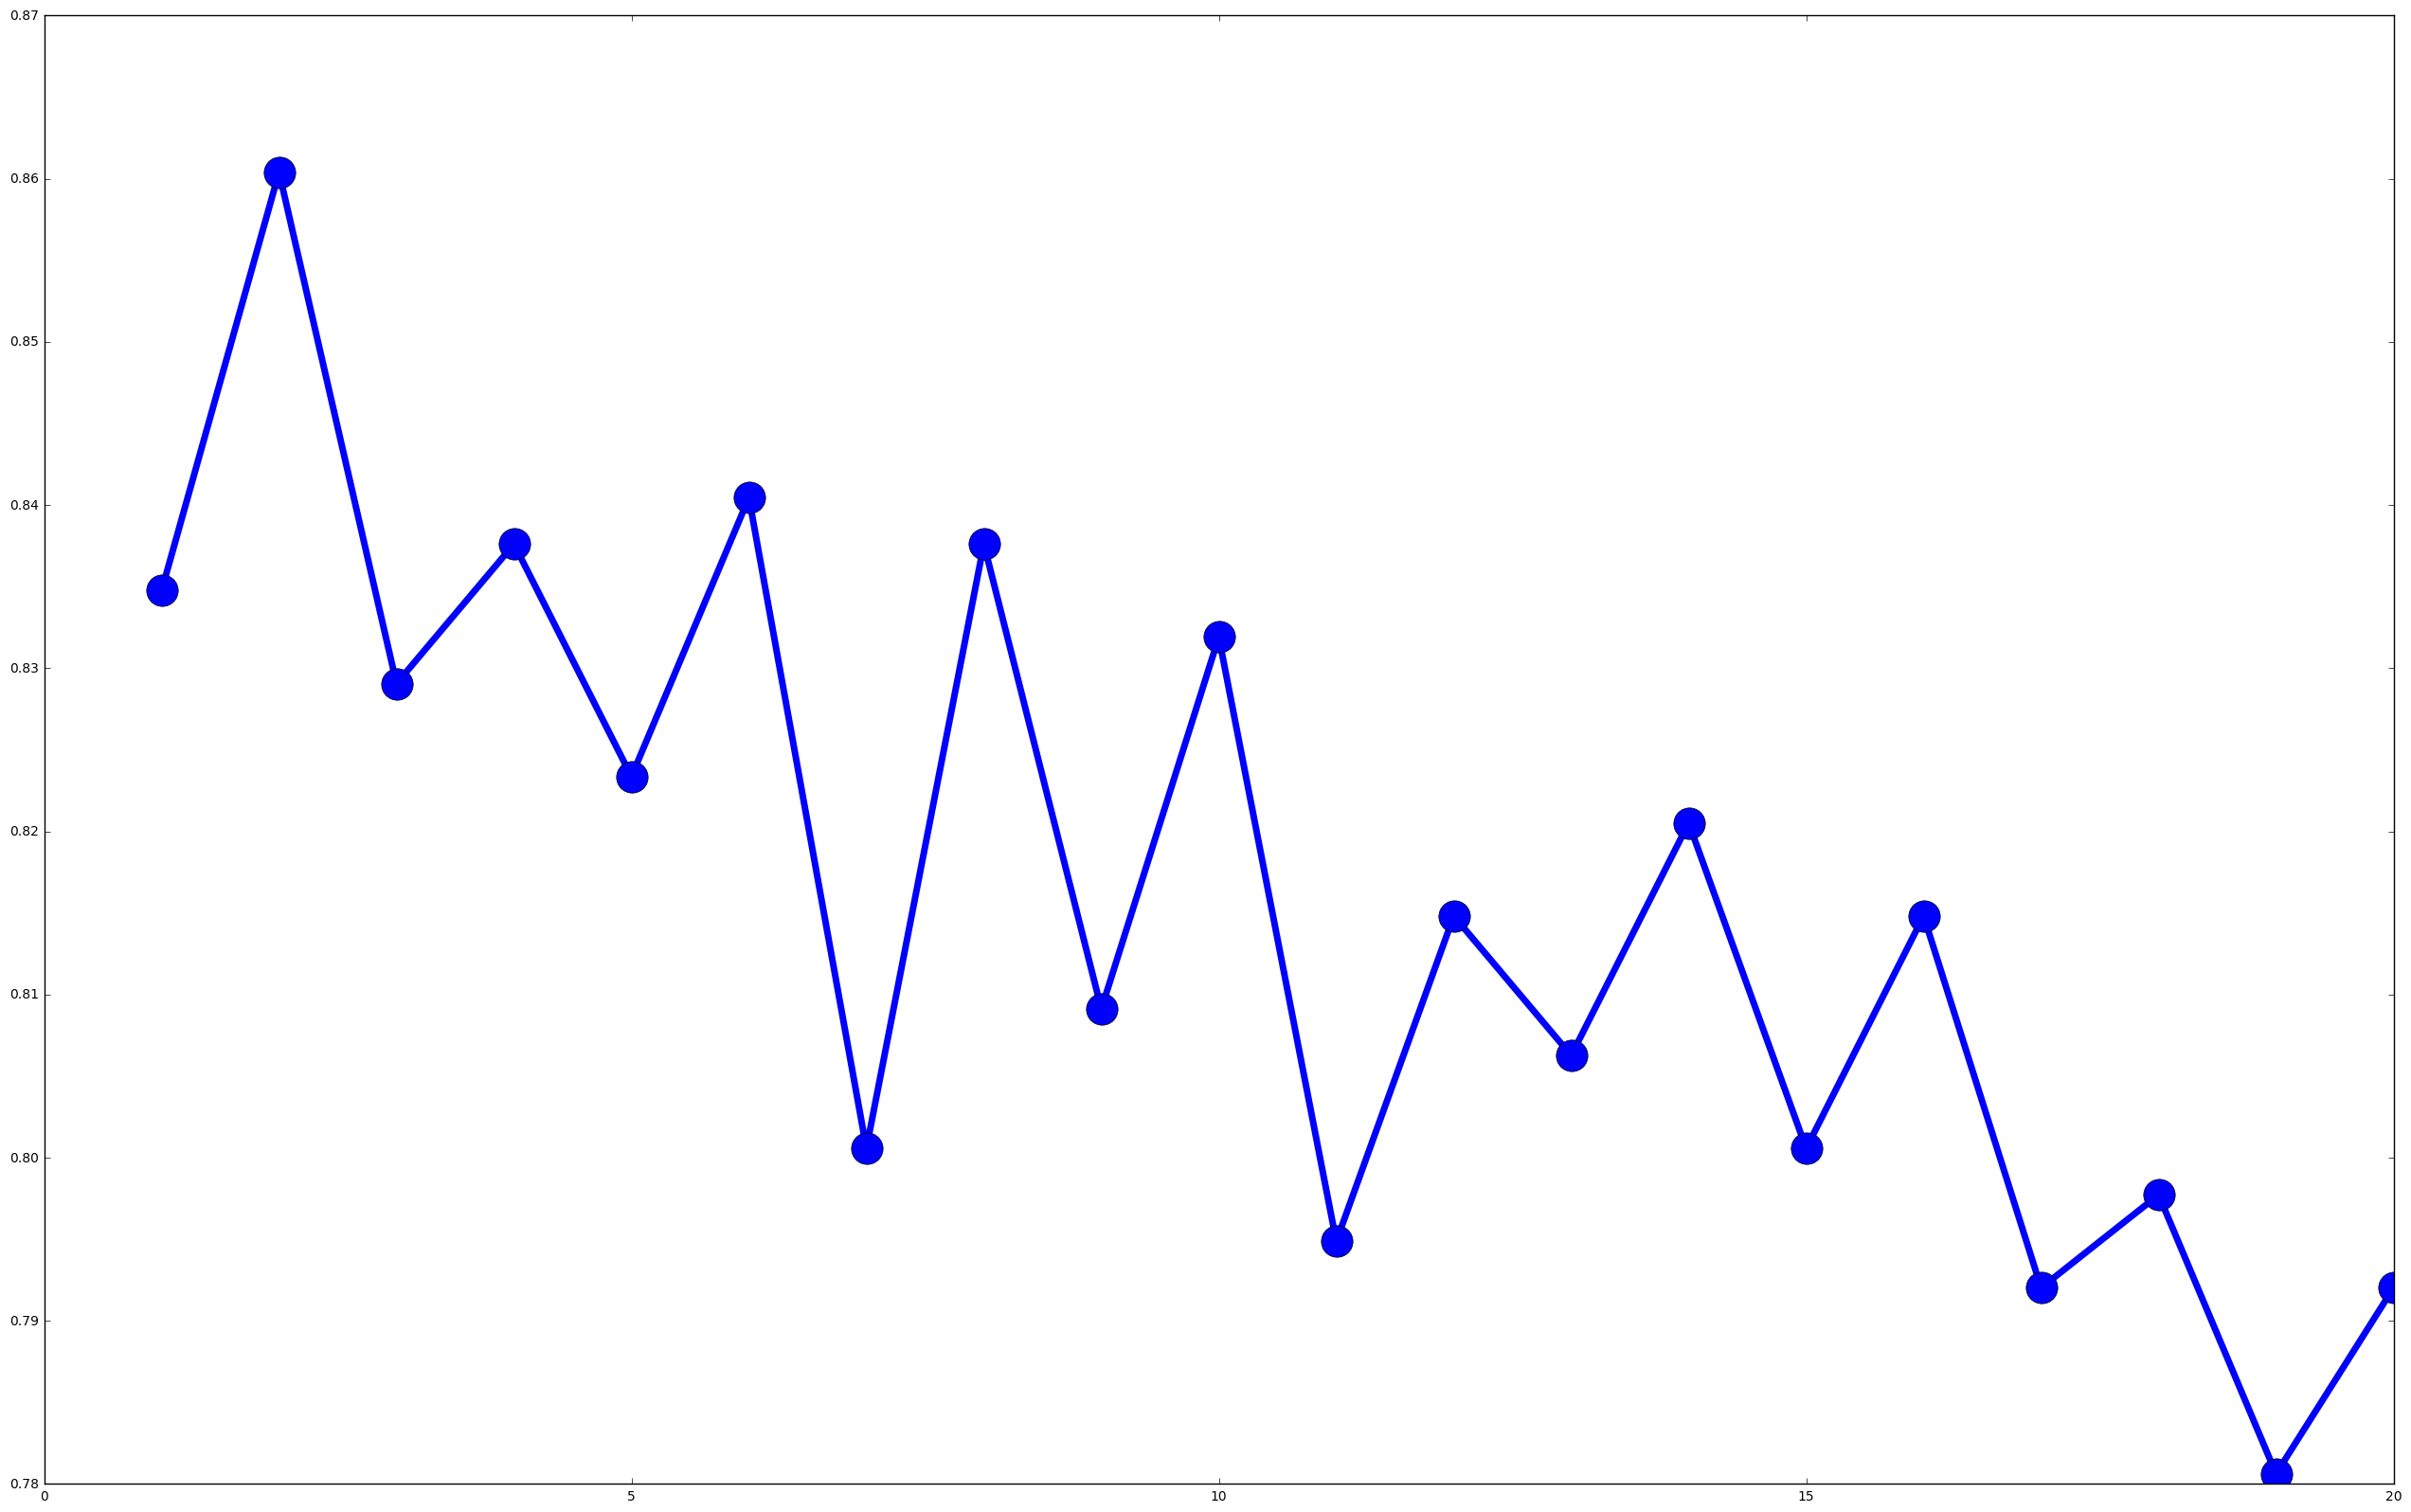

In [13]:
from matplotlib import pyplot as plt
plt.figure(figsize=(32,20))
plt.plot(parameter_values, avg_scores, '-o', linewidth=5, markersize=24)
#plt.axis([0, max(parameter_values), 0, 1.0])

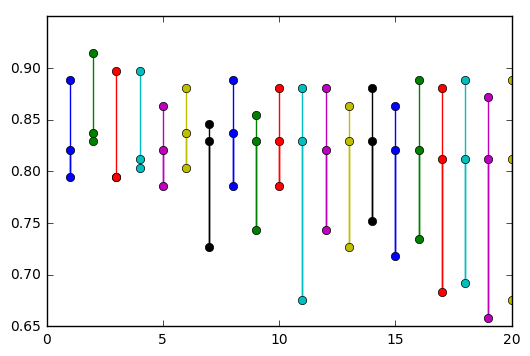

In [14]:
for parameter, scores in zip(parameter_values, all_scores):
    n_scores = len(scores)
    plt.plot([parameter] * n_scores, scores, '-o')

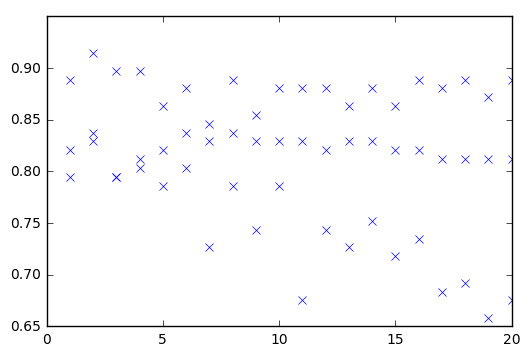

In [15]:
plt.plot(parameter_values, all_scores, 'bx')

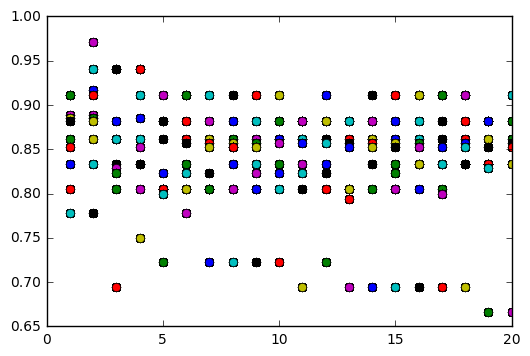

In [16]:
from collections import defaultdict
all_scores = defaultdict(list)
parameter_values = list(range(1, 21))  # Including 20
for n_neighbors in parameter_values:
    for i in range(100):
        estimator = KNeighborsClassifier(n_neighbors=n_neighbors)
        scores = cross_val_score(estimator, X, y, scoring='accuracy', cv=10)
        all_scores[n_neighbors].append(scores)
for parameter in parameter_values:
    scores = all_scores[parameter]
    n_scores = len(scores)
    plt.plot([parameter] * n_scores, scores, '-o')

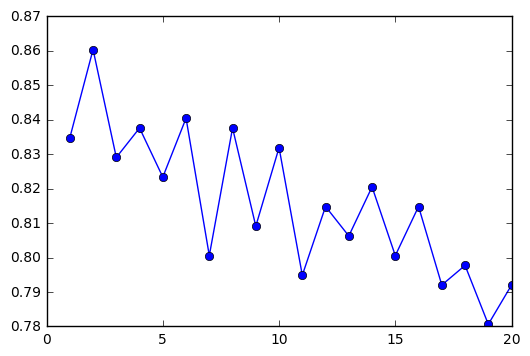

In [17]:
plt.plot(parameter_values, avg_scores, '-o')

In [19]:
X_broken = np.array(X)

In [20]:
X_broken[:,::2] /= 10

In [23]:
estimator = KNeighborsClassifier()
original_scores = cross_val_score(estimator, X, y,
  scoring='accuracy')
print("The original average accuracy for is {0:.1f}%".format(np.mean(original_scores) * 100))
broken_scores = cross_val_score(estimator, X_broken, y,
  scoring='accuracy')
print("The 'broken' average accuracy for is {0:.1f}%".format(np.mean(broken_scores) * 100))


The original average accuracy for is 82.3%
The 'broken' average accuracy for is   71.5%


In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
X_transformed = MinMaxScaler().fit_transform(X)

In [27]:
X_transformed = MinMaxScaler().fit_transform(X_broken)
estimator = KNeighborsClassifier()
transformed_scores = cross_val_score(estimator, X_transformed, y, 
  scoring='accuracy')
print("The average accuracy for is {0:.1f}%".format(np.mean(transformed_scores) * 100))


The average accuracy for is 82.3%


In [28]:
from sklearn.pipeline import Pipeline

In [29]:
scaling_pipeline = Pipeline([('scale', MinMaxScaler()),
                             ('predict', KNeighborsClassifier())])


In [30]:
scores = cross_val_score(scaling_pipeline, X_broken, y, scoring='accuracy')
print("The pipeline scored an average accuracy for is {0:.1f}%".format(np.mean(transformed_scores) * 100))


The pipeline scored an average accuracy for is 82.3%
